In [2]:
from database.market import Market
from database.sec import SEC
from database.adatabase import ADatabase
from processor.processor import Processor as p
from datetime import datetime, timedelta
import pytz
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
from statistics import stdev

In [3]:
market = Market()
sec = SEC()

In [4]:
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()

In [5]:
keywords = ["capital","inventory","sales",'receivables','marketable','earnings',"debt","liabilities","assets","stockholder","equity","income","revenue","depreciation","expenditure","taxrate","ebit","cash"]

In [6]:
filings = []
sec.connect()
market.connect()
column_database = {}
for i in tqdm(range(sp5.index.size)):
    try:
        row = sp5.iloc[i]
        ticker = row["Symbol"]
        cik = int(row["CIK"])
        prices = market.retrieve_ticker_prices("prices",ticker)
        prices = p.column_date_processing(prices)
        price_variance = stdev(prices["adjclose"])
        prices = prices.groupby(["year","ticker"]).mean().reset_index()
        prices["variance"] = price_variance
        financials = sec.retrieve_filing_data(int(cik))
        financials = p.column_date_processing(financials)
        financials["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in financials["filed"]]
        financials["year"] = [x.year for x in financials["date"]]
        financials["quarter"] = [x.quarter for x in financials["date"]]
        financials = financials[financials["form"]=="10-K"]
        included = ["year","quarter","date"]
        for keyword in keywords:
            included.extend([x for x in financials.columns if keyword in x])
        included = list(set(included))
        included.sort()
        for col in included:
            if col in column_database.keys():
                column_database[col] = column_database[col] + 1
            else:
                column_database[col] = 1
        cleaned = financials[included].reset_index(drop=True).fillna(method="ffill").fillna(method="bfill")
        cleaned = cleaned.groupby(["year"]).mean().reset_index()
        cleaned["ticker"] = ticker
        cleaned["industry"] = row["GICS Sector"]
        cleaned = cleaned.merge(prices[["year","ticker","adjclose","variance"]],on=["year","ticker"])
        filings.extend(cleaned.to_dict("records"))
    except Exception as e:
        print(ticker,str(e))
        continue
sec.disconnect()
market.disconnect()

  1%|█                                                                                                                                                                        | 3/490 [00:00<02:32,  3.18it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  1%|█▋                                                                                                                                                                       | 5/490 [00:01<02:07,  3.79it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  1%|██                                                                                                                                                                       | 6/490 [00:01<02:06,  3.82it/s]C:\Users

  6%|█████████▌                                                                                                                                                              | 28/490 [00:09<02:41,  2.86it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  6%|█████████▉                                                                                                                                                              | 29/490 [00:10<02:49,  2.72it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  6%|██████████▎                                                                                                                                                             | 30/490 [00:10<03:17,  2.32it/s]C:\Users

 11%|██████████████████▌                                                                                                                                                     | 54/490 [00:20<02:35,  2.79it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 11%|██████████████████▊                                                                                                                                                     | 55/490 [00:20<02:27,  2.96it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 12%|███████████████████▌                                                                                                                                                    | 57/490 [00:20<02:15,  3.21it/s]C:\Users

 16%|███████████████████████████                                                                                                                                             | 79/490 [00:29<02:08,  3.21it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 17%|███████████████████████████▊                                                                                                                                            | 81/490 [00:30<02:18,  2.95it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 17%|████████████████████████████                                                                                                                                            | 82/490 [00:30<02:18,  2.94it/s]C:\Users

 22%|█████████████████████████████████████▏                                                                                                                                 | 109/490 [00:40<02:17,  2.77it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 22%|█████████████████████████████████████▍                                                                                                                                 | 110/490 [00:41<03:03,  2.08it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 23%|█████████████████████████████████████▊                                                                                                                                 | 111/490 [00:42<02:56,  2.14it/s]C:\Users

 28%|███████████████████████████████████████████████▎                                                                                                                       | 139/490 [00:51<02:04,  2.81it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 29%|███████████████████████████████████████████████▋                                                                                                                       | 140/490 [00:52<02:03,  2.84it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 29%|████████████████████████████████████████████████▍                                                                                                                      | 142/490 [00:53<02:21,  2.46it/s]C:\Users

 34%|████████████████████████████████████████████████████████▌                                                                                                              | 166/490 [01:02<01:49,  2.97it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 34%|████████████████████████████████████████████████████████▉                                                                                                              | 167/490 [01:02<01:42,  3.14it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 34%|█████████████████████████████████████████████████████████▎                                                                                                             | 168/490 [01:03<01:34,  3.40it/s]C:\Users

 39%|█████████████████████████████████████████████████████████████████▍                                                                                                     | 192/490 [01:13<02:20,  2.12it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 39%|█████████████████████████████████████████████████████████████████▊                                                                                                     | 193/490 [01:13<02:07,  2.33it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 40%|██████████████████████████████████████████████████████████████████▍                                                                                                    | 195/490 [01:14<01:46,  2.77it/s]C:\Users

 44%|██████████████████████████████████████████████████████████████████████████▎                                                                                            | 218/490 [01:24<02:03,  2.21it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                            | 219/490 [01:24<02:06,  2.15it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 45%|██████████████████████████████████████████████████████████████████████████▉                                                                                            | 220/490 [01:25<01:55,  2.34it/s]C:\Users

 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 243/490 [01:33<01:23,  2.97it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 245/490 [01:34<01:30,  2.72it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 50%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 246/490 [01:35<01:28,  2.75it/s]C:\Users

 56%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 273/490 [01:45<01:12,  2.99it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 56%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 274/490 [01:46<01:21,  2.64it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 56%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 276/490 [01:47<01:29,  2.39it/s]C:\Users

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 297/490 [01:55<01:05,  2.97it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 298/490 [01:55<01:06,  2.89it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 299/490 [01:55<01:13,  2.60it/s]C:\Users

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 327/490 [02:06<00:57,  2.81it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 329/490 [02:07<01:06,  2.43it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 330/490 [02:07<00:58,  2.74it/s]C:\Users

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 360/490 [02:17<00:46,  2.81it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 361/490 [02:17<00:44,  2.89it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 362/490 [02:18<00:45,  2.83it/s]C:\Users

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 388/490 [02:29<00:49,  2.07it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 391/490 [02:30<00:34,  2.90it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 392/490 [02:30<00:32,  3.00it/s]C:\Users

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 419/490 [02:41<00:21,  3.24it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 421/490 [02:42<00:22,  3.01it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 422/490 [02:42<00:20,  3.29it/s]C:\Users

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 449/490 [02:51<00:14,  2.85it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 450/490 [02:52<00:14,  2.80it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 451/490 [02:52<00:13,  2.98it/s]C:\Users

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 476/490 [03:02<00:06,  2.16it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 477/490 [03:02<00:05,  2.53it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_8128/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 478/490 [03:03<00:04,  2.54it/s]C:\Users

In [7]:
financials = pd.DataFrame(filings)

In [8]:
col_db = pd.DataFrame([column_database]).melt()

In [30]:
col_db[col_db["variable"].str.contains("")].sort_values("value",ascending=False).head(30)

,variable,value
105,date,490
397,quarter,490
435,year,490
284,liabilitiesandstockholdersequity,490
20,assets,490
305,netcashprovidedbyusedininvestingactivities,489
303,netcashprovidedbyusedinfinancingactivities,489
166,earningspersharediluted,486
307,netcashprovidedbyusedinoperatingactivities,486
263,incometaxexpensebenefit,486


In [29]:
financials[financials["ticker"]=="MMM"][["year","quarter","ticker","commonstockdividendspersharecashpaid"]].dropna().sort_values(["year","quarter"])

,year,quarter,ticker,commonstockdividendspersharecashpaid
0,2012,1.0,MMM,2.113333
1,2013,1.0,MMM,2.220000
2,2014,1.0,MMM,2.366667
3,2015,1.0,MMM,2.293750
4,2016,1.0,MMM,3.353333
5,2017,1.0,MMM,3.986667
6,2018,1.0,MMM,4.413333
7,2019,1.0,MMM,4.413333
8,2020,1.0,MMM,4.413333
9,2021,1.0,MMM,4.413333


In [10]:
tax_rate_col = "effectiveincometaxratereconciliationatfederalstatutoryincometaxrate"
capex_col = "capitalexpendituresincurredbutnotyetpaid"
debt_issue_col = "proceedsfromissuanceoflongtermdebt"
debt_repay_col = "repaymentsoflongtermdebt"
cfo_col = "netcashprovidedbyusedinoperatingactivities"
cff = "netcashprovidedbyusedinfinancingactivities"
cfi = "netcashprovidedbyusedinoperatingactivities"
cash_col = "cashandcashequivalentsatcarryingvalue"
operating_income_col = "incomelossfromcontinuingoperationsbeforeincometaxesdomestic"
number_of_commonshares_col = "equityunitsharesissued"
preferred_dividends_col = "dividendspreferredstockcash"

In [11]:
financials["price_to_earnings"] = financials["adjclose"] / financials["earningspersharebasic"]
financials["current_ratio"] = financials["assetscurrent"] / financials["liabilitiescurrent"]
financials["longterm_debt_to_equity"] = financials["longtermdebt"] / financials["stockholdersequity"]
financials["debt_to_equity"] = (financials["longtermdebt"] + financials["debtcurrent"]) / financials["stockholdersequity"]
financials["debt_to_assets"] = financials["longtermdebt"] / financials["assets"]
financials["financial_leverage"] = financials["assets"] / financials["stockholdersequity"]
financials["net_profit_margin"] = financials["netincomeloss"] / financials["revenues"]
financials["working_capital"] = (financials["assetscurrent"] - financials["liabilitiescurrent"]) / 1000000
financials["quick_ratio"] = (financials[cash_col] + financials["marketablesecuritiescurrent"] + financials["receivablesnetcurrent"]) / financials["liabilitiescurrent"]
financials["cash_ratio"] = (financials[cash_col] + financials["marketablesecuritiescurrent"]) / financials["liabilitiescurrent"]
financials["free_cash_flow_to_firm"] = financials[cfo_col] + financials["interestincomeexpensenet"] * (1+financials[tax_rate_col]) - financials[capex_col]
financials["free_cash_flow_to_equity"] = financials[cfo_col] + - financials[capex_col] + (financials[debt_issue_col] - financials[debt_repay_col])
financials["cash_flow_to_revenue"] = financials[cfo_col] / financials["revenues"]
financials["cash_return_on_assets"] = financials[cfo_col] / financials["assets"]
financials["cash_return_on_equity"] = financials[cfo_col] / financials["stockholdersequity"]
financials["cash_to_income"] = financials[cfo_col] / financials[operating_income_col]
financials["cash_flow_per_share"] = (financials[cfo_col] - financials[preferred_dividends_col]) / financials[number_of_commonshares_col]
financials["cash_debt_coverage"] = financials[cfo_col] / financials["debtcurrent"]
financials["cash_interest_coverage"] = (financials[cfo_col] + financials["interestincomeexpensenet"] + financials["incometaxespaidnet"]) / financials["interestincomeexpensenet"]
financials["cash_debt_payment_ratio"] = financials[cfo_col] / financials["repaymentsoflongtermdebt"]
financials["cash_dividend_payment_ratio"] = financials[cfo_col] / financials[preferred_dividends_col]
financials["cash_invest_and_financing_ratio"] = financials[cfo_col] / (financials[cfi] + financials[cff])

In [12]:
factors = ["year"
           ,"ticker"
           ,"current_ratio"
           ,"price_to_earnings"
           ,"longterm_debt_to_equity"
           ,"debt_to_equity"
           ,"debt_to_assets"
           ,"financial_leverage"
           ,"quick_ratio"
           ,"cash_ratio"
           ,"free_cash_flow_to_firm"
            ,"free_cash_flow_to_equity"
            ,"cash_flow_to_revenue"
            ,"cash_return_on_assets"
            ,"cash_return_on_equity"
            ,"cash_to_income"
            ,"cash_flow_per_share"
            ,"cash_debt_coverage"
            ,"cash_interest_coverage"
            ,"cash_debt_payment_ratio"
            ,"cash_dividend_payment_ratio"
            ,"cash_invest_and_financing_ratio"
           ,"net_profit_margin"
           ,"working_capital"
           ,"variance"
           ,"adjclose"]


In [13]:
analysis = financials[factors]
analysis = analysis.merge(sp5.rename(columns={"Symbol":"ticker"})[["ticker","Security","GICS Sector"]],on="ticker",how="left")

In [14]:
analysis["GICS Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [15]:
year = 2023

In [16]:
analysis[(analysis["year"]==year)].sort_values("price_to_earnings",ascending=True).head(50)

,year,ticker,current_ratio,price_to_earnings,longterm_debt_to_equity,debt_to_equity,debt_to_assets,financial_leverage,quick_ratio,cash_ratio,...,cash_interest_coverage,cash_debt_payment_ratio,cash_dividend_payment_ratio,cash_invest_and_financing_ratio,net_profit_margin,working_capital,variance,adjclose,Security,GICS Sector
692,2023,BAX,1.879857,-1284.652561,2.240376,NaN,0.540448,4.145406,NaN,NaN,...,-8.045770,1.069181,NaN,0.450650,NaN,3951.0000,22.609787,42.821752,Baxter International,Health Care
1386,2023,CEG,1.094188,-487.522108,0.418222,NaN,0.097921,4.271035,NaN,NaN,...,NaN,-0.562489,NaN,0.380564,0.003631,745.5000,14.511530,79.628611,Constellation Energy,Utilities
2553,2023,HST,NaN,-296.031865,0.090792,NaN,0.048495,1.872177,NaN,NaN,...,NaN,233.500000,NaN,1.272480,-0.006804,NaN,4.307690,16.775139,Host Hotels & Resorts,Real Estate
2478,2023,HES,1.515934,-272.986784,1.170046,1.201554,0.392371,2.981985,NaN,NaN,...,-7.086237,8.006863,NaN,1.251072,-0.018283,1408.5000,26.777745,139.223260,Hess Corporation,Energy
1087,2023,CDAY,1.092165,-203.568069,0.435376,NaN,0.120039,3.626951,NaN,NaN,...,NaN,5.770992,NaN,0.075824,-0.074880,381.3500,22.966072,68.534583,Ceridian,Information Technology
2276,2023,GE,1.217466,-125.924554,NaN,NaN,NaN,5.042803,NaN,NaN,...,NaN,1.506878,16.040050,-0.221738,-0.018246,11841.0000,37.239905,89.063003,GE,Industrials
2747,2023,IFF,1.958837,-97.510102,0.545839,0.564361,0.281889,1.936362,NaN,NaN,...,NaN,1.727458,NaN,-5.126761,NaN,3529.0000,40.277959,96.209967,International Flavors & Fragrances,Materials
137,2023,AES,1.158246,-96.502150,NaN,NaN,NaN,13.489844,NaN,NaN,...,NaN,1.919792,NaN,0.622162,-0.032601,888.0000,7.544468,24.476454,AES Corporation,Utilities
5256,2023,WBD,1.150844,-93.147917,1.086278,NaN,0.378548,2.869595,NaN,NaN,...,NaN,3.792731,NaN,-32.478548,-0.215107,1393.5000,10.793302,13.972187,Warner Bros. Discovery,Communication Services
3818,2023,OXY,1.187551,-91.219832,0.933451,0.956703,0.317339,2.941492,NaN,NaN,...,NaN,9.719315,15.599500,7.097134,0.009888,1508.0000,21.087190,61.725420,Occidental Petroleum,Energy


In [28]:
analysis.corr()["adjclose"].sort_values()

cash_dividend_payment_ratio       -0.061141
cash_debt_payment_ratio           -0.009300
cash_flow_to_revenue              -0.005245
cash_to_income                    -0.004758
cash_debt_coverage                -0.004189
longterm_debt_to_equity            0.002135
debt_to_assets                     0.002627
cash_return_on_equity              0.004944
financial_leverage                 0.005626
working_capital                    0.006455
price_to_earnings                  0.007106
cash_invest_and_financing_ratio    0.008280
free_cash_flow_to_equity           0.014407
net_profit_margin                  0.019715
current_ratio                      0.023483
cash_interest_coverage             0.027469
debt_to_equity                     0.029305
cash_ratio                         0.061960
free_cash_flow_to_firm             0.088144
cash_return_on_assets              0.107413
quick_ratio                        0.107449
year                               0.218999
variance                        

In [18]:
# start_date = datetime(2020,1,1)
# window = financials[financials["date"]>= start_date]
# plt.plot(window["date"],window["price_to_earnings"])

In [29]:
factors = ["cash_ratio",
"free_cash_flow_to_firm",
"cash_return_on_assets",
"quick_ratio",
"cash_dividend_payment_ratio"]

In [30]:
included = ["year","quarter","ticker"]

In [19]:
spy = pd.read_csv("./csv_files/FED/SPY.csv")

In [20]:
spy = p.column_date_processing(spy)

In [21]:
spy["year"] = [x.year for x in spy["date"]]
spy["quarter"] = [x.quarter for x in spy["date"]]
spy_quarterly = spy.groupby(["year","quarter"]).mean().reset_index()
spy_quarterly = spy_quarterly.rename(columns={"adjclose":"spy"})

In [22]:
cpi = pd.read_csv("./csv_files/FED/CPIAUCSL.csv")
cpi = p.column_date_processing(cpi)
cpi["year"] = [x.year for x in cpi["date"]]
cpi["quarter"] = [x.quarter for x in cpi["date"]]
cpi_quarterly = cpi.groupby(["year","quarter"]).mean().reset_index()
cpi_quarterly.rename(columns={"cpiaucsl":"cpi"},inplace=True)
cpi_quarterly["inflation"] = cpi_quarterly["cpi"].pct_change()
cpi_quarterly

,year,quarter,cpi,week,inflation
0,1947,1,21.700000,5.0,NaN
1,1947,2,22.010000,18.0,0.014286
2,1947,3,22.490000,31.333333,0.021808
3,1947,4,23.126667,44.333333,0.028309
4,1948,1,23.616667,5.333333,0.021188
...,...,...,...,...,...
299,2021,4,278.413333,43.666667,0.019219
300,2022,1,284.607667,22.0,0.022249
301,2022,2,291.821667,17.333333,0.025347
302,2022,3,295.884000,30.666667,0.013921


In [23]:
ticker = "AAPL"
financials_example = financials[financials["ticker"]==ticker].copy()

In [24]:
graphics = financials_example.merge(cpi_quarterly,on=["year","quarter"],how="left") \
                            .merge(spy_quarterly,on=["year","quarter"],how="left").copy()
graphics["date"] = [datetime(int(row[1]["year"]),int((row[1]["quarter"] - 1) * 3 + 1),1) for row in graphics.iterrows()]
graphics = graphics[(graphics["date"]>datetime(2013,1,1))].copy()
graphics.sort_values("date",inplace=True)

cpi_prog = [0]
for i in range(1,graphics.index.size):
    prev = cpi_prog[i-1]
    cpi_prog.append((1+prev) * (1 +  graphics["inflation"].iloc[i]) -1)
    
graphics["inflation_prog"] = cpi_prog
for vals in ["assets","liabilities","stockholdersequity","spy","debt_to_equity","adjclose"]:
    graphics[f"{vals}_adj"] = [row[1][vals] * (1-row[1]["inflation_prog"]) for row in graphics.iterrows()]
    
    
graphics["adjclose_prog"] = (graphics["adjclose"] - graphics["adjclose"].iloc[0]) / graphics["adjclose"].iloc[0]
graphics["adjclose_delt"] = graphics["adjclose_prog"].pct_change()
graphics["adjclose_prog_adj"] = (graphics["adjclose_adj"] - graphics["adjclose_adj"].iloc[0]) / graphics["adjclose_adj"].iloc[0]
graphics["adjclose_delt_adj"] = graphics["adjclose_prog"].pct_change()
    
graphics["spy_prog"] = (graphics["spy"] - graphics["spy"].iloc[0]) / graphics["spy"].iloc[0]
graphics["spy_delt"] = graphics["spy_prog"].pct_change()
graphics["spy_prog_adj"] = (graphics["spy_adj"] - graphics["spy_adj"].iloc[0]) / graphics["spy_adj"].iloc[0]
graphics["spy_delt_adj"] = graphics["spy_prog"].pct_change()

graphics["se_prog"] = (graphics["stockholdersequity"] - graphics["stockholdersequity"].iloc[0]) / graphics["stockholdersequity"]
graphics["se_delt"] = graphics["se_prog"].pct_change().iloc[0]
graphics["se_prog_adj"] = (graphics["stockholdersequity_adj"] - graphics["stockholdersequity_adj"].iloc[0]) / graphics["stockholdersequity_adj"].iloc[0]
graphics["se_delt_adj"] = graphics["se_prog"].pct_change()

graphics["assets_prog"] = (graphics["assets"] - graphics["assets"].iloc[0]) / graphics["assets"].iloc[0]
graphics["assets_delt"] = graphics["assets_prog"].pct_change()
graphics["assets_prog_adj"] = (graphics["assets_adj"] - graphics["assets_adj"].iloc[0]) / graphics["assets_adj"].iloc[0]
graphics["assets_delt_adj"] = graphics["assets_prog"].pct_change()

graphics["liabilities_prog"] = (graphics["liabilities"] - graphics["liabilities"].iloc[0]) / graphics["liabilities"].iloc[0]
graphics["liabilities_delt"] = graphics["liabilities_prog"].pct_change()
graphics["liabilities_prog_adj"] = (graphics["liabilities_adj"] - graphics["liabilities_adj"].iloc[0]) / graphics["liabilities_adj"].iloc[0]
graphics["liabilities_delt_adj"] = graphics["liabilities_prog"].pct_change()

graphics["debt_to_equity_prog"] = (graphics["debt_to_equity"] - graphics["debt_to_equity"].iloc[0]) / graphics["debt_to_equity"].iloc[0]
graphics["debt_to_equity_delt"] = graphics["debt_to_equity_prog"].pct_change()
graphics["debt_to_equity_prog_adj"] = (graphics["debt_to_equity_adj"] - graphics["debt_to_equity_adj"].iloc[0]) / graphics["debt_to_equity_adj"].iloc[0]
graphics["debt_to_equity_delt_adj"] = graphics["debt_to_equity_prog"].pct_change()

graphics["cpi_delt"] = graphics["inflation_prog"].pct_change()

In [25]:
graphics

,year,accrualfortaxesotherthanincometaxescurrent,accruedincometaxescurrent,accruedincometaxesnoncurrent,accumulateddepreciationdepletionandamortizationpropertyplantandequipment,accumulateddepreciationforcapitalleases,accumulatedothercomprehensiveincomelossavailableforsalesecuritiesadjustmentnetoftax,accumulatedothercomprehensiveincomelosscumulativechangesinnetgainlossfromcashflowhedgeseffectnetoftax,accumulatedothercomprehensiveincomelossdefinedbenefitpensionandotherpostretirementplansnetoftax,accumulatedothercomprehensiveincomelossforeigncurrencytranslationadjustmentnetoftax,...,assets_delt_adj,liabilities_prog,liabilities_delt,liabilities_prog_adj,liabilities_delt_adj,debt_to_equity_prog,debt_to_equity_delt,debt_to_equity_prog_adj,debt_to_equity_delt_adj,cpi_delt
1,2013,NaN,NaN,1.692300e+10,9.178500e+09,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,NaN,NaN,1.692300e+10,1.515650e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,inf,0.441867,inf,0.445449,inf,NaN,NaN,NaN,NaN,-inf
3,2015,NaN,NaN,1.692300e+10,2.258850e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,1.496710,1.062319,1.404161,1.067598,1.404161,NaN,NaN,NaN,NaN,0.030384
4,2016,NaN,NaN,1.692300e+10,3.051050e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,0.644240,1.579010,0.486380,1.569283,0.486380,NaN,NaN,NaN,NaN,-2.473344
5,2017,NaN,NaN,1.692300e+10,3.776400e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,0.371119,2.076388,0.314994,2.040219,0.314994,NaN,NaN,NaN,NaN,2.117193
6,2018,NaN,NaN,1.692300e+10,4.519600e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,0.140278,2.537384,0.222018,2.482722,0.222018,NaN,NaN,NaN,NaN,0.314345
7,2019,NaN,NaN,3.156700e+10,5.383900e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,-0.102807,2.585195,0.018843,2.507624,0.018843,NaN,NaN,NaN,NaN,0.400176
8,2020,NaN,NaN,2.885750e+10,6.266950e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,-0.130262,2.584990,-0.000079,2.487076,-0.000079,NaN,NaN,NaN,NaN,0.262326
9,2021,NaN,NaN,2.642950e+10,6.852150e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,0.044698,2.867245,0.109190,2.685266,0.109190,NaN,NaN,NaN,NaN,0.722904
10,2022,NaN,NaN,2.067300e+10,7.131150e+10,NaN,270000000.0,-207500000.0,NaN,-48500000.0,...,0.098919,3.175330,0.107450,2.945013,0.107450,NaN,NaN,NaN,NaN,0.172237


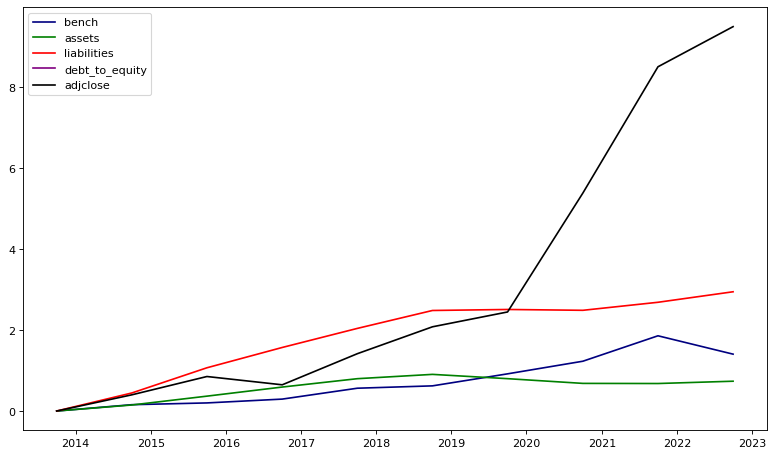

In [26]:
metric = "prog"
plt.figure(figsize=(12, 7), dpi=80)
# plt.plot(graphics["date"],graphics[f"spy_{metric}"],color="blue")
plt.plot(graphics["date"],graphics[f"spy_{metric}_adj"],color="navy")
# plt.plot(graphics["date"],graphics[f"assets_{metric}"],color="maroon")
plt.plot(graphics["date"],graphics[f"assets_{metric}_adj"],color="green")
# plt.plot(graphics["date"],graphics[f"liabilities_{metric}"],color="maroon")
plt.plot(graphics["date"],graphics[f"liabilities_{metric}_adj"],color="red")
# plt.plot(graphics["date"],graphics[f"assets_{metric}"],color="navy")
plt.plot(graphics["date"],graphics[f"debt_to_equity_{metric}"],color="purple")
plt.plot(graphics["date"],graphics[f"adjclose_{metric}"],color="black")
plt.legend(["bench","assets","liabilities","debt_to_equity","adjclose"])
plt.show()